<a href="https://colab.research.google.com/github/vishnu0401/Vishnu-Venugopal/blob/master/CIFAR10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
import os
os.chdir("/drive/My Drive")

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,MaxPool2D

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 1)

In [0]:
y_test.shape

(10000, 1)

In [0]:
y_train[1]

array([9], dtype=uint8)

In [0]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)

In [0]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

x_train/=255
x_test/=255

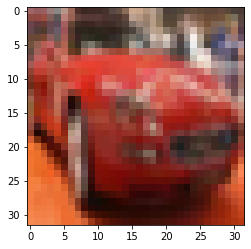

In [0]:
plt.imshow(x_train[5])

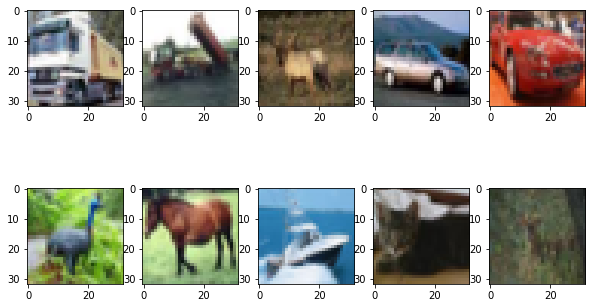

In [0]:
plt.figure(figsize=(10,6))

for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_train[i].reshape(32,32,3))

In [0]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)


In [0]:
from keras.layers import Convolution2D

In [0]:
#making model
def make_model():
  model=Sequential()

  model.add(Conv2D(16,(3,3),padding="same",activation='relu',input_shape=(32,32,3)))

  model.add(Conv2D(32,(3,3),padding="valid",activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),padding="same"))
  model.add(Dropout(0.20))
  
  model.add(Conv2D(16,(3,3),padding="valid",activation='relu',input_shape=(32,32,3)))
  model.add(Dropout(0.20))

  model.add(Flatten())
  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.20))
  
  model.add(Dense(10,activation='softmax'))

  return model
  
  

In [0]:
#compling model
model=make_model()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.fit(x_train,y_train,batch_size=100,verbose=1,epochs=30)

Epoch 1/30
50000/50000 [==============================] - 151s 3ms/step - loss: 0.1321 - acc: 0.9558
Epoch 2/30
50000/50000 [==============================] - 150s 3ms/step - loss: 0.1310 - acc: 0.9554
Epoch 3/30
50000/50000 [==============================] - 149s 3ms/step - loss: 0.1224 - acc: 0.9594
Epoch 4/30
50000/50000 [==============================] - 149s 3ms/step - loss: 0.1241 - acc: 0.9589
Epoch 5/30
50000/50000 [==============================] - 149s 3ms/step - loss: 0.1305 - acc: 0.9580
Epoch 6/30
50000/50000 [==============================] - 149s 3ms/step - loss: 0.1208 - acc: 0.9596
Epoch 7/30
50000/50000 [==============================] - 149s 3ms/step - loss: 0.1128 - acc: 0.9630
Epoch 8/30
50000/50000 [==============================] - 148s 3ms/step - loss: 0.1121 - acc: 0.9623
Epoch 9/30
50000/50000 [==============================] - 147s 3ms/step - loss: 0.1145 - acc: 0.9635
Epoch 10/30
50000/50000 [==============================] - 148s 3ms/step - loss: 0.1091 - a

In [0]:
test_result=model.evaluate(x_test,y_test,verbose=0)

In [0]:
test_result

[1.8016722164154053, 0.7133]

In [0]:
model.save_weights('my_model_weights.h5')

In [0]:
weight=model.load_weights('my_model_weights.h5')